### 统计学：检验心理学现象

在下方单元格中回答问题并执行相关代码，你可以 [参考项目指导](https://github.com/udacity/new-dand-advanced-china/blob/master/%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1/%E7%BB%9F%E8%AE%A1%E5%AD%A6%EF%BC%9A%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1.md) 并在正式提交前查看 [项目要求](https://review.udacity.com/#!/rubrics/305/view)。提交时请将 Jupyter notebook 导出成 HTML 或者 PDF 进行提交（File -> Download As）。

背景信息

在一个Stroop （斯特鲁普）任务中，参与者得到了一列文字，每个文字都用一种油墨颜色展示。参与者的任务是将文字的打印颜色大声说出来。这项任务有两个条件：一致文字条件，和不一致文字条件。在一致文字条件中，显示的文字是与它们的打印颜色匹配的颜色词，如“红色”、“蓝色”。在不一致文字条件中，显示的文字是与它们的打印颜色不匹配的颜色词，如“紫色”、“橙色”。在每个情况中，我们将计量说出同等大小的列表中的墨色名称的时间。每位参与者必须全部完成并记录每种条件下使用的时间。

调查问题

作为一般说明，请确保记录你在创建项目时使用或参考的任何资源。作为项目提交的一部分，你将需要报告信息来源。

(1) 我们的自变量是什么？因变量是什么？

--答案写这里--

自变量： 在一致文字条件下的一列文字 或 在不一致文字条件下的一列文字
        
因变量： 说出同等大小的列表中的墨色名称的时间

(2) 此任务的适当假设集是什么？你需要以文字和数学符号方式对假设集中的零假设和对立假设加以说明，并对数学符号进行定义。你想执行什么类型的统计检验？为你的选择提供正当理由（比如，为何该实验满足你所选统计检验的前置条件）。

--答案写这里--

原假设 Ho: 读取一致文字条件下的时间总体均值 等于 读取不一致文字条件下的时间总体均值 相同.       μ$ _{c} $ = μ$ _{i} $  


备择假设Ha: 读取一致文字条件下的时间总体均值 小于 读取不一致文字条件下的时间总体均值.       μ$ _{c} $ < μ$ _{i} $ 


实验是同一组实验者参加了两次实验（两次实验情况是，只有一个条件有变化，即文字及其颜色是否一致），而不是两组实验者分别参加实验，因此是相依样本而不是独立样本。

假设样本中分布接近为正态分布，我们需要对比两个样本中的均值，来确认时间是否有显著性差异。


由于样本容量n = 24，小于30， 备择假设Ha为：μ$ _{c} $ ！= μ$ _{i} $ ，故选择双样本t检验。 


现在轮到你自行尝试 Stroop 任务了。前往此链接，其中包含一个基于 Java 的小程序，专门用于执行 Stroop 任务。记录你收到的任务时间（你无需将时间提交到网站）。现在下载此数据集，其中包含一些任务参与者的结果。数据集的每行包含一名参与者的表现，第一个数字代表他们的一致任务结果，第二个数字代表不一致任务结果。

(3) 报告关于此数据集的一些描述性统计。包含至少一个集中趋势测量和至少一个变异测量。

In [1]:
# 在这里执行你的分析

import pandas as pd

df = pd.read_csv('stroopdata.csv')

statistics = df.describe()

statistics

#μ已经代表总体均值，那么描述性统计部分使用的μ应当由其他符号代替，因为计算的是样本统计量而非总体

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


--答案写这里--

we can see from the form  

n=24

$\bar{x}$$ _{c} $ = 14.05, $\bar{x}$$ _{i} $ = 22.02,

σ$ _{c} $ = 3.56,  σ$ _{i} $ = 4.80


(4) 提供显示样本数据分布的一个或两个可视化。用一两句话说明你从图中观察到的结果。

Text(0,0.5,'Time')

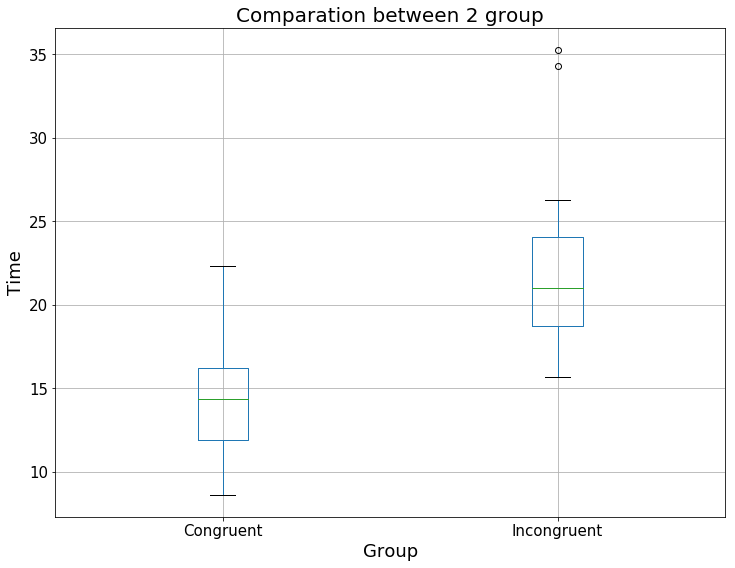

In [3]:
# 在这里创建可视化图表
import matplotlib.pyplot as plt

boxplot = df.boxplot(column=['Congruent', 'Incongruent'], figsize = (12, 9), grid = True, fontsize = 15)

plt.title('Comparation between 2 group', fontsize = 20)
plt.xlabel('Group', fontsize = 18)
plt.ylabel('Time', fontsize = 18)

--答案写这里--

左右对比可以看到，从平均数，和大多数数据的情况来看

右侧颜色和文字不一致的组 平均耗时明显要高


(5) 现在，执行统计测试并报告你的结果。你的置信水平和关键统计值是多少？你是否成功拒绝零假设？对试验任务得出一个结论。结果是否与你的期望一致？

In [5]:
# 在这里执行统计检验

import math

mean_difference = statistics.Incongruent['mean'] - statistics.Congruent['mean']  #7.96

sample_std = (df['Congruent']- df['Incongruent']).std()   #4.86
#numpy中.std()计算的是总体标准偏差，  pandas中.std()计算的是样本标准偏差

t = mean_difference/(sample_std/math.sqrt(24))
t


#请避免在假设检验的结论中下绝对的判断，比如“备择假设成立/正确”“零假设不成立/不正确”“推翻/否定零假设”等。
#在没有总体数据的情况下，任何结论都只是一种推断，只能根据结论拒绝或者接受零假设。

8.020706944109957

--答案写这里--

在显著性水平 α 为0.05 (1-95%), 自由度结果 df = n-1 (23)，查表t临界值为1.714.

而计算出t值是8.02， 远大于1.714.

t值是8.02查表，此时两组均值相等的概率P远小于0.1%，由于这个概率非常小，因此可以拒绝零假设，与预期一致。